In [1]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
using Plots
gr()

Plots.GRBackend()

# Loading
#### Initial load should be in line with Mike's gravity model - 200 km wide with linear decrease to ~37.5 Mpa, double that and reversed sign on the opposite side of the fault (center of the model domain) 

#### we assume lithosphere is ~ 100 km, so 70 Mpa is about 2500m of crust at 2.75 g/cc


#### The spatial extent of the anomaly indicates it is approximately ~ 200 km long, we extend it therefore from 350:650 km within the model domain width

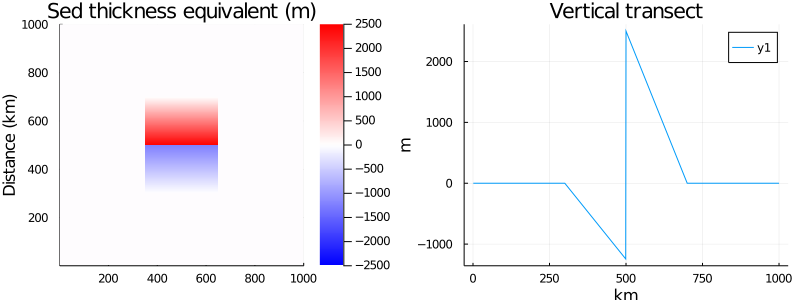

In [24]:
L = zeros(1000,1000)

maxsed = 2500 #Maximum sediment thickness at rho = 2750 kg/m3

for i =300:499
    L[i, 350:650] .= - (i - 300) / 200 .* maxsed/2; #Minima is about half the maximum
end

for i =500:700
    L[i, 350:650] .= (700 - i ) / 200 .* maxsed;
end

p = heatmap(L,c=:bwr,clims=(-2500,2500),ylabel = "Distance (km)", title = "Sed thickness equivalent (m)")
plot(p, plot(L[:,500],xlabel = ("km"), ylabel="m",title="Vertical transect"),size=(800,300),fmt = :png)

## First is the test with uniform Te 10 km, no in-plane stress

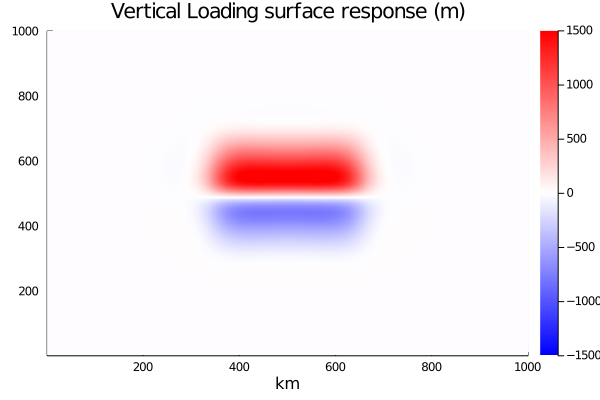

In [35]:
dy = 1000.0
dx = 1000.0
E = 100e9
g = 9.81
v = .25
pm = 3300.0
pc = 2750.0
buffer = 0
ncores = 5
pw = 0
firstiter=true
Te = 10e3
m,n = size(L);


w_0 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx)
w_1 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx,Ny= 10^12)
w_3 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx,Ny= 3* 10^12)
w_10 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx,Ny= 10* 10^12)

heatmap(w_0,xlabel="km",title = "Vertical Loading surface response (m)",c=:bwr,clims=(-1500,1500),fmt = :png)

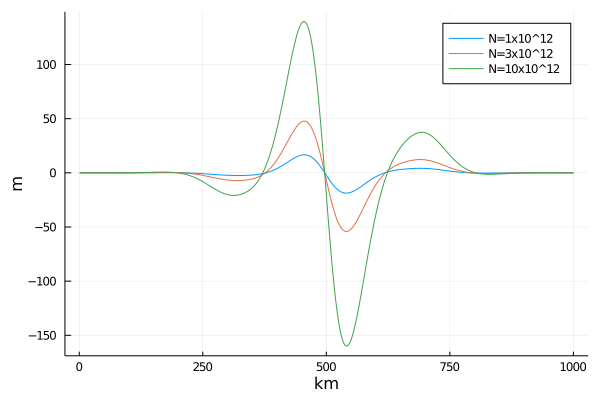

In [34]:
v1 = w_1-w_0
v3 = w_3-w_0
v10 = w_10-w_0
plot(v1[:,500],xlabel="km",ylabel="m",label="N=1x10^12",fmt = :png)
plot!(v3[:,500],xlabel="km",ylabel="m",label="N=3x10^12",fmt = :png)
plot!(v10[:,500],xlabel="km",ylabel="m",label="N=10x10^12",fmt = :png)

# Variable Te

### The Elastic thickness is high for Australian Craton as a whole according to Tesauro et al., 2011 - however locally it may be much lower within the basins, as low as 10 km

### We need a smooth function though, not abrupt changes in Te - something like a gaussian surface

In [30]:
Te = zeros(1000,1000)
Te[300:700, 350:650] .= 0e3 #Minima is about half the maximum

for i = 1:1000
    for j = 1:1000
        r = sqrt((i-500)^2 + (j-500)^2)
        Te[i, j] = 60e3 - 55e3 * exp(-r/20^2)
    end
end


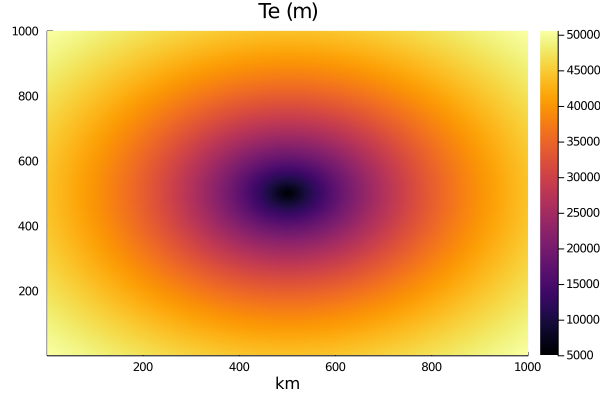

In [31]:
heatmap(Te,xlabel="km",title="Te (m)",fmt = :png)

## Now calculate the flexural response without any in-plane stress and variable Te 

In [ ]:

## Can take a few seconds to converge
w = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=60e3)


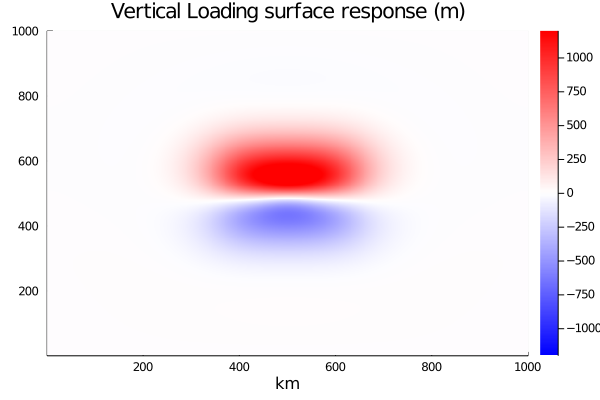

In [28]:
heatmap(w,xlabel="km",title = "Vertical Loading surface response (m)",c=:bwr,clims=(-1200,1200),fmt = :png)

### Now run with the in-plane stress of 3e12

In [ ]:
w3 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=60e3,Ny=3e12)


In [ ]:
w10 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=60e3,Ny=10e12)


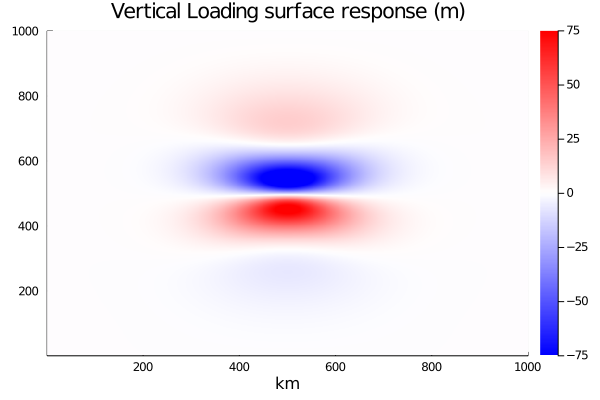

In [25]:
heatmap(w10 .- w,xlabel="km",title = "Vertical Loading surface response (m)",c=:bwr,clims=(-75,75),fmt = :png)

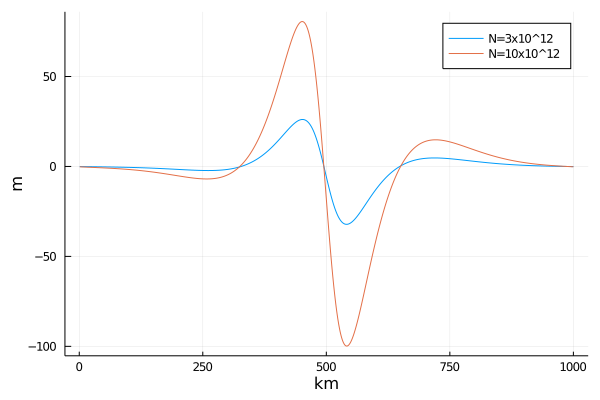

In [27]:
v3 = w2.-w
v10 = w10.-w

plot(v3[:,500],xlabel="km",ylabel="m",label="N=3x10^12",fmt = :png)
plot!(v10[:,500],xlabel="km",ylabel="m",label="N=10x10^12",fmt = :png)